### Author: Narendra Eluri

### Created On: 05-09-2024

### About the Dataset
Attrition Analytics dataset is a CSV type data source. It represents an organization. It is having 38 columns and 1480 rows. The dataset describes various factors influencing the employees to leave the organization. Here Exploratory Data Analysis will be conducted to find various reasons why these employees were leaving the organization.

### Import libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Create Dataframe for the CSV data

In [9]:
df=pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [11]:
# Neighbourhood group was 'brookln' of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [16]:
#Drop Duplicate Records
df.drop_duplicates(inplace=True)
#Drop house_rules and license columns with insufficient data
#df.drop(['house_rules','license'],axis=1,inplace=True)
#Remove all dollar signs in the price and service fee columns
#df['price'] = df['price'].str.replace('$','', regex=False)
#df['service fee'] = df['service fee'].str.replace('$','', regex= False)
#Remove all commas in the price and service fee columns
#df['price'] = df['price'].str.replace(',','', regex=False)
#df['service fee'] = df['service fee'].str.replace(',','',regex=False)
#Rename the price and service fee columns to include a dollar sign
df.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace = True)
#Drop all the records with missing values
df.dropna(inplace = True)
#Change all the mismatched data types to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)
#Correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group'] = 'Brooklyn'
#Gety rid of outliers in the 'avalibality 365' column data
df = df.drop(df[df['availability 365']>500].index)

In [17]:
df.duplicated().value_counts()

,count
False,83389


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [19]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [20]:
#what are the different property types in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


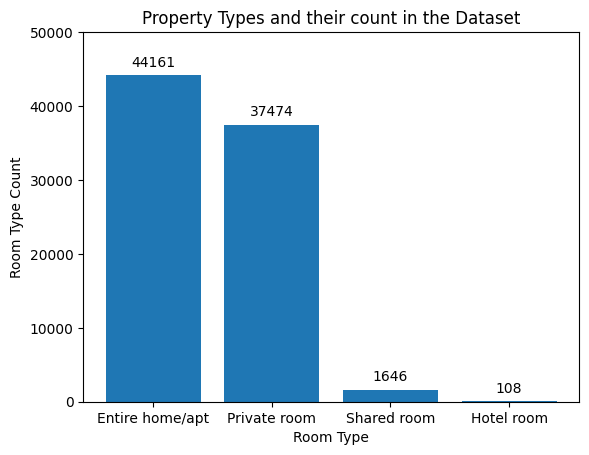

In [21]:
#Room type count plotted on a bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"] );
plt.bar_label(room_type_bar, labels=property_types.loc[:,"count"], padding=4 );
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [22]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


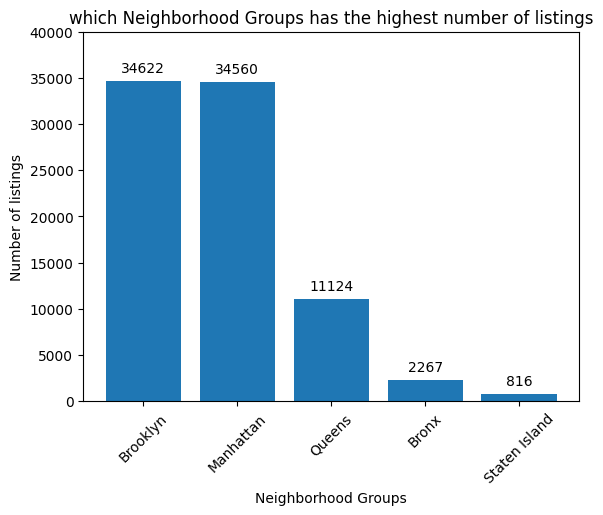

In [23]:
#Which neighbourhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"] );
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,"count"], padding= 4 );
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of listings');
plt.xticks(rotation=45);
plt.title('which Neighborhood Groups has the highest number of listings');

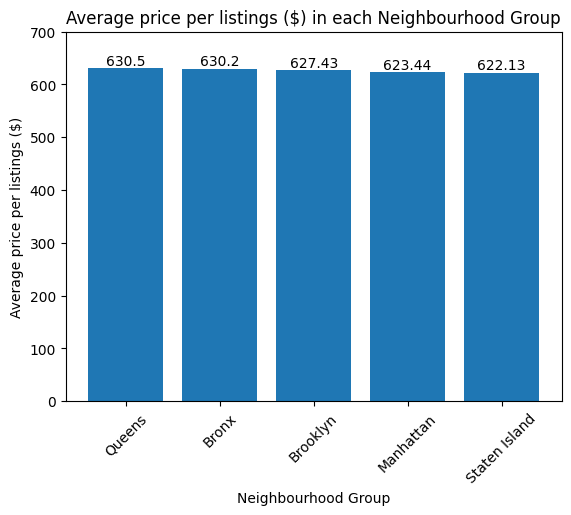

In [27]:
#Which neighborhoods group have the highest average prices for Airbnb liarings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False)
avg_price_bar = plt.bar(avg_price.index, avg_price);
plt.bar_label(avg_price_bar, labels = round(avg_price,2), label_type='edge');
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average price per listings ($)');
plt.xticks(rotation = 45);
plt.title ('Average price per listings ($) in each Neighbourhood Group');

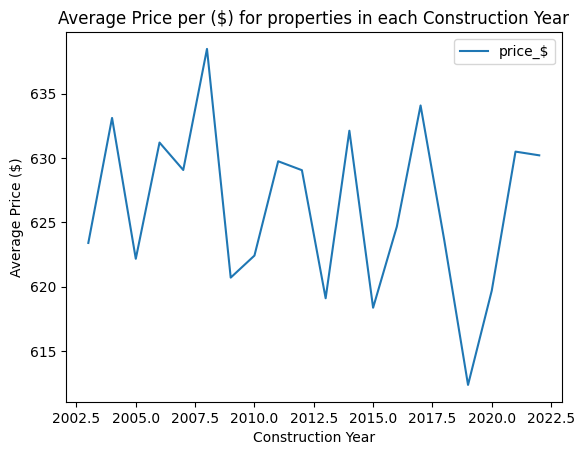

In [28]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year']) ['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price per ($) for properties in each Construction Year');

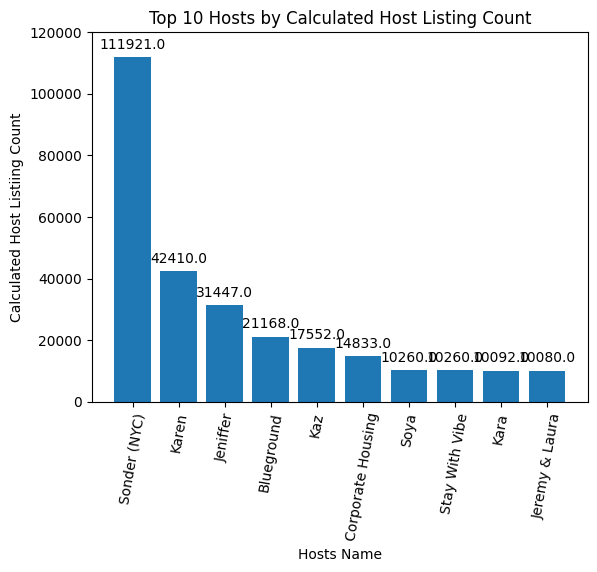

In [30]:
#Who are the top 10 hosts by calculated host listing count?
hosts =df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).head(10)
hosts_bar = plt.bar(hosts.index, hosts);
plt.bar_label(hosts_bar, labels = hosts, padding= 4);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listiing Count');
plt.xticks(rotation = 80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listing Count');

In [33]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False)

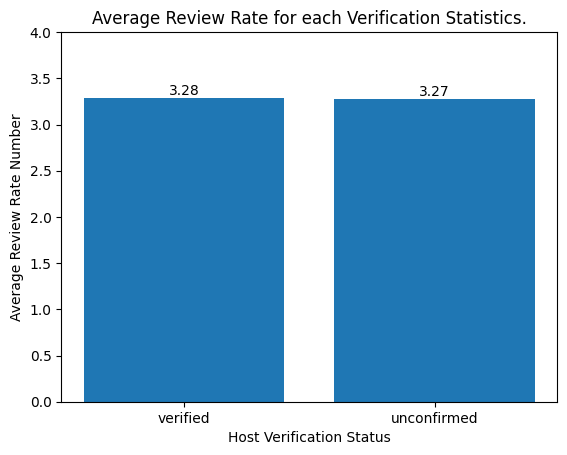

In [35]:
review_bar = plt.bar(review.index, review);
plt.bar_label(review_bar, labels = round(review,2));
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

In [36]:
#Is there a correlation between the price of a listing and its servicde fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909082976466)

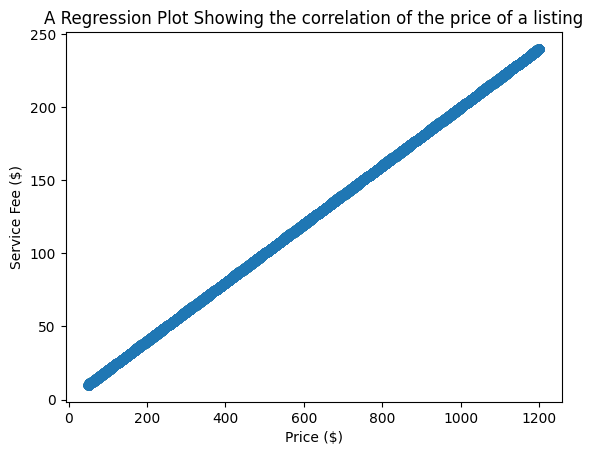

In [38]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot Showing the correlation of the price of a listing');

In [40]:
#What is the average review rate number (e.g., stars) for listings, and does it vary by neighbourhood group and room type?
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean()
display(ARRN)

neighbourhood group  room type      
Bronx                Entire home/apt    3.381881
                     Private room       3.305810
                     Shared room        3.356322
Brooklyn             Entire home/apt    3.242491
                     Hotel room         3.833333
                     Private room       3.274773
                     Shared room        3.323383
Manhattan            Entire home/apt    3.268846
                     Hotel room         3.500000
                     Private room       3.285431
                     Shared room        3.261976
Queens               Entire home/apt    3.349528
                     Hotel room         3.750000
                     Private room       3.310847
                     Shared room        3.327402
Staten Island        Entire home/apt    3.333333
                     Private room       3.497449
                     Shared room        3.714286
Name: review rate number, dtype: float64

Text(0.5, 1.0, 'Average Review Rate for each room /Property type in each Neighbourh')

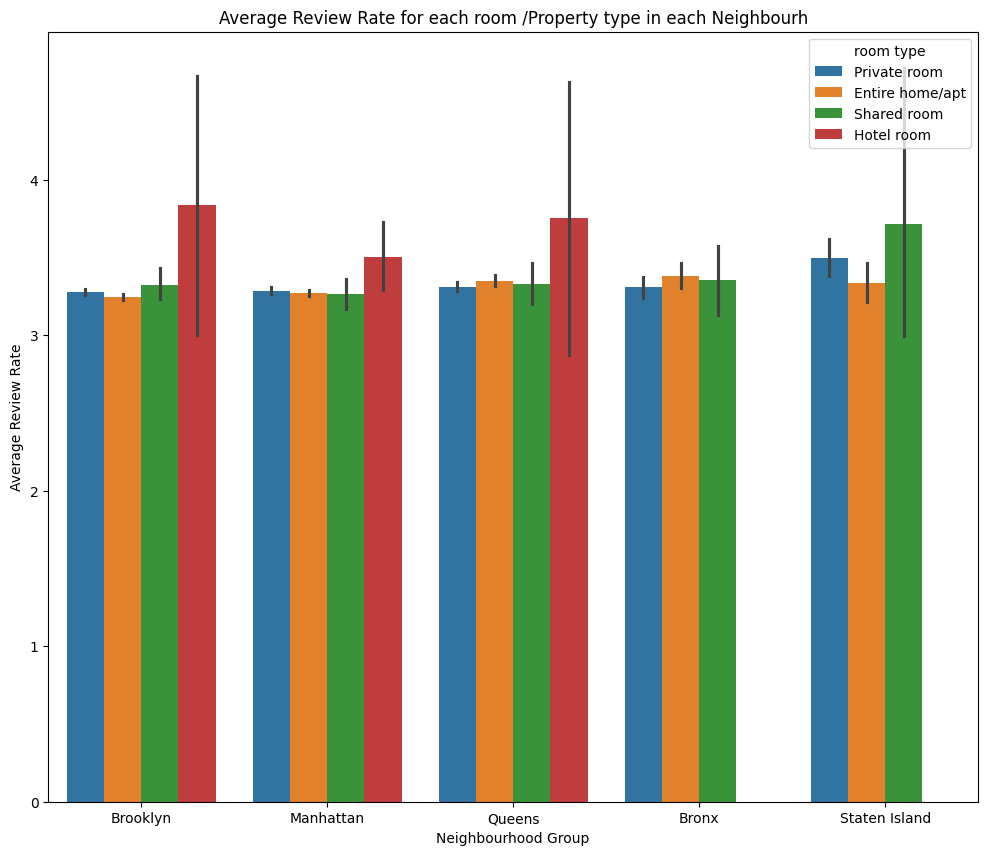

In [42]:
plt.figure(figsize= [12,10]);
sns.barplot(data=df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each room /Property type in each Neighbourh')

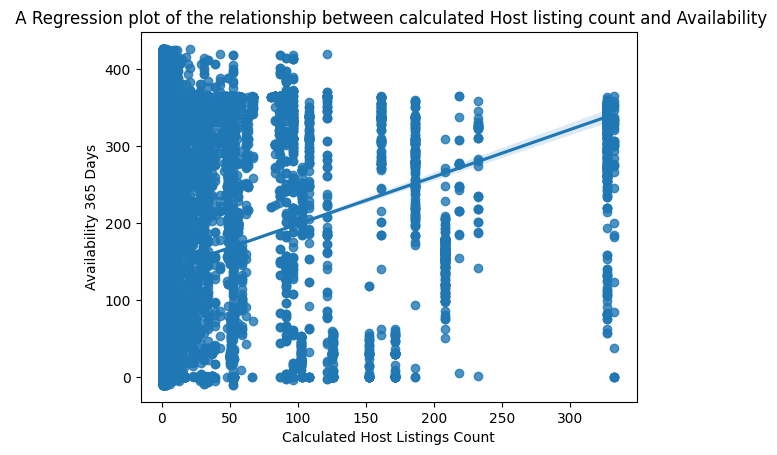

In [44]:
#Are hosts with a higher calculated host listings count more likely to mantain higher availability?
sns.regplot (df,x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365 Days');
plt.title(' A Regression plot of the relationship between calculated Host listing count and Availability');

In [45]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359971471570339)

### Statistics of the Dataset

In [ ]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


### Null Report of the Dataset

In [ ]:
print("Nulls present in the dataset column wise")
df.isnull().sum()

Nulls present in the dataset column wise


,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
print("Total No.of Nulls present in the dataset:",df.isnull().sum().sum())

Total No.of Nulls present in the dataset: 193503


### Display all the Rows having atleast one Null

In [ ]:
df[df['YearsWithCurrManager'].isnull()]

KeyError: 'YearsWithCurrManager'

### Imputing all the nulls with Average value of YearsWithCurrManager Column

In [ ]:
df['YearsWithCurrManager'].mean()

KeyError: 'YearsWithCurrManager'

In [ ]:
df['YearsWithCurrManager'].fillna(round(df['YearsWithCurrManager'].mean()),inplace=True)

### Rows with atleast one null

In [ ]:
df[df['YearsWithCurrManager'].isnull()]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


### Note: All Nulls in YearsWithCurrManager Column have been removed

In [ ]:
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

### All Columns of the Dataset

In [ ]:
for col in df.columns:
    print(col)

EmpID
Age
AgeGroup
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
SalarySlab
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


### Column's information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

### Column Datatypes

In [ ]:
df.dtypes

EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

### No.of Numerical Columns of the Dataset

In [ ]:
num_numeric_cols = df.select_dtypes(include=['int64','float64'])
print("No.of Numerical Columns in the Dataset:",len(num_numeric_cols.columns))

No.of Numerical Columns in the Dataset: 26


### No.of Categorical Columns of the Dataset

In [ ]:
num_categorical_cols = df.select_dtypes(include=['object'])
print("No.of Categorical Columns in the Dataset:",len(num_categorical_cols.columns))

No.of Categorical Columns in the Dataset: 12


### HIstogram for all numerical features to show their distributions

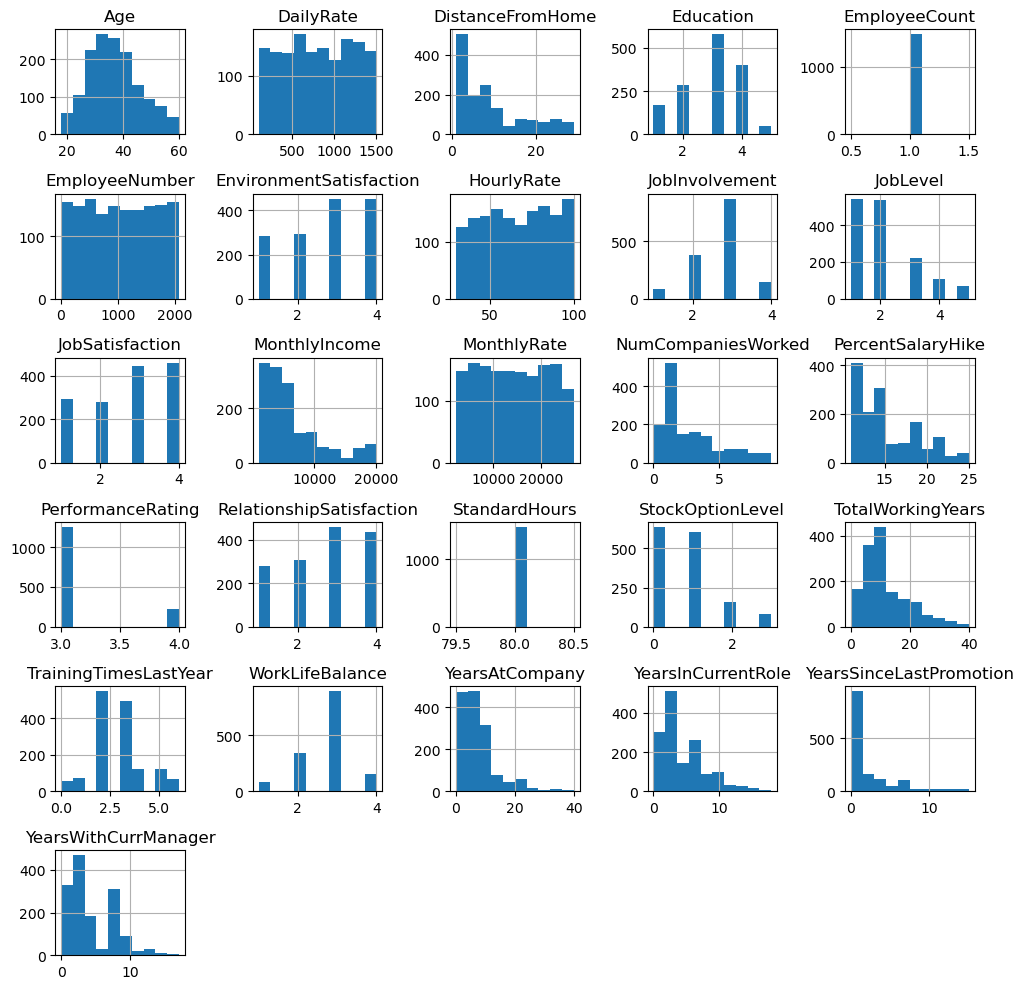

In [ ]:
df.hist(bins=10,layout=(6,5),figsize=(10,10))
plt.tight_layout()
plt.show()

### Select Important Columns for the Analysis

In [ ]:
df.dtypes

EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

In [ ]:
selected_cols = ['EmpID','Age','AgeGroup','Attrition','Department','Gender','EducationField','SalarySlab','YearsAtCompany','MonthlyIncome']

In [ ]:
df1 = df[selected_cols]
df1.head()

,EmpID,Age,AgeGroup,Attrition,Department,Gender,EducationField,SalarySlab,YearsAtCompany,MonthlyIncome
0,RM297,18,18-25,Yes,Research & Development,Male,Life Sciences,Upto 5k,0,1420
1,RM302,18,18-25,No,Sales,Female,Medical,Upto 5k,0,1200
2,RM458,18,18-25,Yes,Sales,Male,Marketing,Upto 5k,0,1878
3,RM728,18,18-25,No,Research & Development,Male,Life Sciences,Upto 5k,0,1051
4,RM829,18,18-25,Yes,Research & Development,Male,Medical,Upto 5k,0,1904


In [ ]:
df1['Attrition Count'] = df1['Attrition'].apply(lambda x: 1 if x=='Yes'   else 0)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7852\1359195363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Attrition Count'] = df1['Attrition'].apply(lambda x: 1 if x=='Yes'   else 0)


In [ ]:
df1.head()

,EmpID,Age,AgeGroup,Attrition,Department,Gender,EducationField,SalarySlab,YearsAtCompany,MonthlyIncome,Attrition Count
0,RM297,18,18-25,Yes,Research & Development,Male,Life Sciences,Upto 5k,0,1420,1
1,RM302,18,18-25,No,Sales,Female,Medical,Upto 5k,0,1200,0
2,RM458,18,18-25,Yes,Sales,Male,Marketing,Upto 5k,0,1878,1
3,RM728,18,18-25,No,Research & Development,Male,Life Sciences,Upto 5k,0,1051,0
4,RM829,18,18-25,Yes,Research & Development,Male,Medical,Upto 5k,0,1904,1


In [ ]:
df1.shape

(1480, 11)

### Outliers Identification

<Axes: ylabel='Age'>

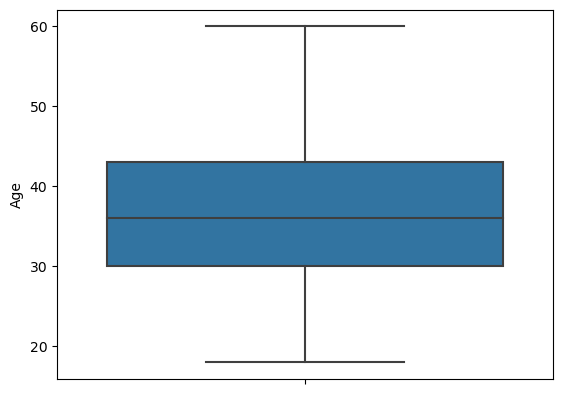

In [ ]:
sns.boxplot(y='Age',data=df1)

### Note: No Outliers present in Age Column

<Axes: ylabel='YearsAtCompany'>

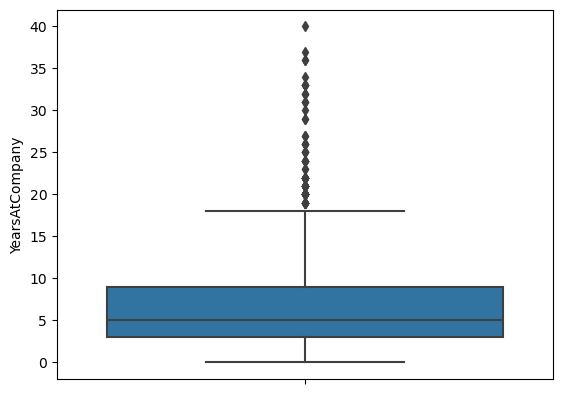

In [ ]:
sns.boxplot(y='YearsAtCompany',data=df1)

### Note: Outliers present in YearsAtCompany Column

<Axes: ylabel='MonthlyIncome'>

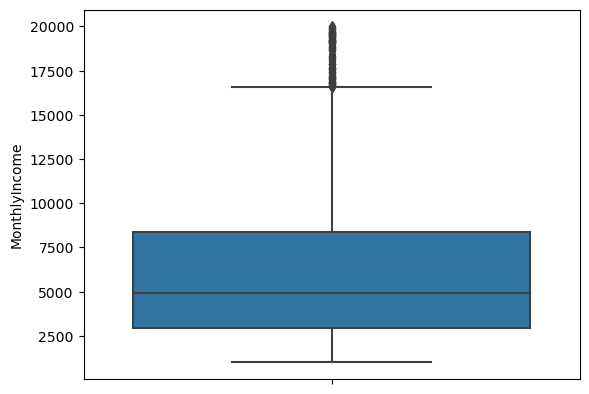

In [ ]:
sns.boxplot(y='MonthlyIncome',data=df1)

### Note: Outliers present in MonthlyIncome Column

### Remove Outliers

In [ ]:
def remove_outlier(col_name):
    sorted(col_name)
    Q1,Q3 = col_name.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


### Removing Outliers for YearsAtCompany Column

In [ ]:
low, high = remove_outlier(df1['YearsAtCompany'])

In [ ]:
df1['YearsAtCompany'] = np.where(df1['YearsAtCompany']>high,high,df1['YearsAtCompany'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_7852\1898679558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['YearsAtCompany'] = np.where(df1['YearsAtCompany']>high,high,df1['YearsAtCompany'])


In [ ]:
df1['YearsAtCompany'] = np.where(df1['YearsAtCompany']<low,low,df1['YearsAtCompany'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_7852\2250738177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['YearsAtCompany'] = np.where(df1['YearsAtCompany']<low,low,df1['YearsAtCompany'])


<Axes: ylabel='YearsAtCompany'>

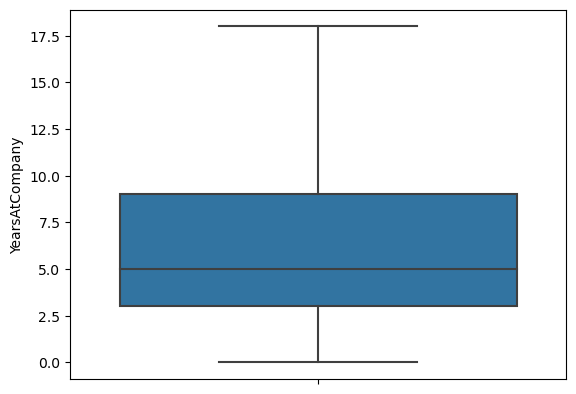

In [ ]:
sns.boxplot(y='YearsAtCompany',data=df1)

### Removing Outliers for MonthlyIncome Column

In [ ]:
low , high = remove_outlier(df1['MonthlyIncome'])

In [ ]:
df1['MonthlyIncome'] = np.where(df1['MonthlyIncome']>high,high,df1['MonthlyIncome'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_7852\3099114034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['MonthlyIncome'] = np.where(df1['MonthlyIncome']>high,high,df1['MonthlyIncome'])


In [ ]:
df1['MonthlyIncome'] = np.where(df1['MonthlyIncome']<low,low,df1['MonthlyIncome'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_7852\3598384224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['MonthlyIncome'] = np.where(df1['MonthlyIncome']<low,low,df1['MonthlyIncome'])


<Axes: ylabel='MonthlyIncome'>

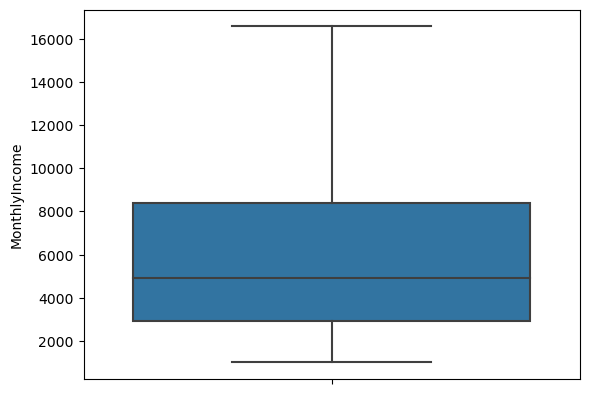

In [ ]:
sns.boxplot(y='MonthlyIncome',data=df1)

In [ ]:
df1.head()

,EmpID,Age,AgeGroup,Attrition,Department,Gender,EducationField,SalarySlab,YearsAtCompany,MonthlyIncome,Attrition Count
0,RM297,18,18-25,Yes,Research & Development,Male,Life Sciences,Upto 5k,0.0,1420.0,1
1,RM302,18,18-25,No,Sales,Female,Medical,Upto 5k,0.0,1200.0,0
2,RM458,18,18-25,Yes,Sales,Male,Marketing,Upto 5k,0.0,1878.0,1
3,RM728,18,18-25,No,Research & Development,Male,Life Sciences,Upto 5k,0.0,1051.0,0
4,RM829,18,18-25,Yes,Research & Development,Male,Medical,Upto 5k,0.0,1904.0,1


### Removing All Duplicates

In [ ]:
print("No.of Rows present in df1:",df1.shape[0])

No.of Rows present in df1: 1480


In [ ]:
df_cleaned = df1.drop_duplicates()

In [ ]:
df_cleaned.head()

,EmpID,Age,AgeGroup,Attrition,Department,Gender,EducationField,SalarySlab,YearsAtCompany,MonthlyIncome,Attrition Count
0,RM297,18,18-25,Yes,Research & Development,Male,Life Sciences,Upto 5k,0.0,1420.0,1
1,RM302,18,18-25,No,Sales,Female,Medical,Upto 5k,0.0,1200.0,0
2,RM458,18,18-25,Yes,Sales,Male,Marketing,Upto 5k,0.0,1878.0,1
3,RM728,18,18-25,No,Research & Development,Male,Life Sciences,Upto 5k,0.0,1051.0,0
4,RM829,18,18-25,Yes,Research & Development,Male,Medical,Upto 5k,0.0,1904.0,1


In [ ]:
print("No.of Rows present in df_cleaned:",df_cleaned.shape[0])

No.of Rows present in df_cleaned: 1470


In [ ]:
print("No.of Duplicate Rows in the final Dataset:",df1.shape[0]-df_cleaned.shape[0])

No.of Duplicate Rows in the final Dataset: 10


### No.of Duplicate rows are 10 and removed from the dataset. Out final dataset is df_cleaned

### Visualization Starts from here

### Attrition by Gender using Bar Plot

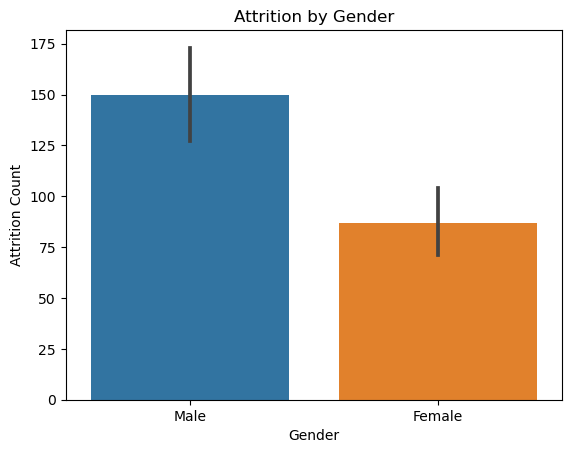

In [ ]:
sns.barplot(x='Gender',y='Attrition Count',data=df_cleaned,estimator=sum)
plt.title('Attrition by Gender')
plt.show()

### Note: Male Employees left the Orgnaization more than Female Employees by more than 70%.

### Attrition by Education using Pie Chart

In [ ]:
df_cleaned['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

<Figure size 2000x1000 with 0 Axes>

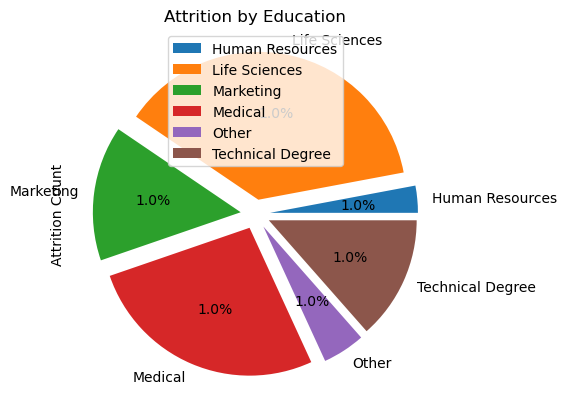

In [ ]:
explode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(20,10))
df_cleaned.groupby(['EducationField']).sum().plot(kind='pie',y='Attrition Count',autopct="1.0%%",explode=explode)
plt.title("Attrition by Education")
plt.show()

### Note: More Attrition was from Employees with Life Sciences Education

### Attrition by Age Group using Column Chart

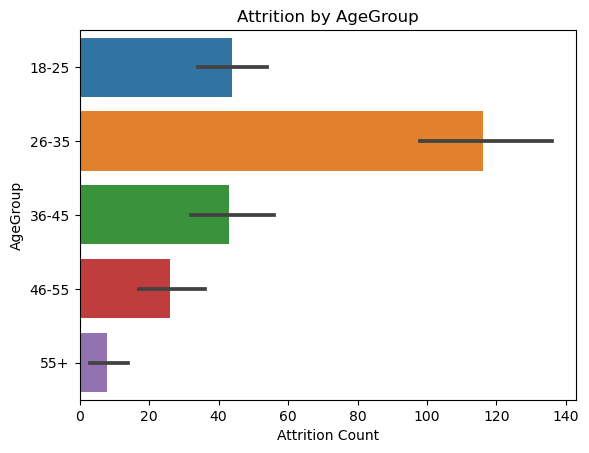

In [ ]:
sns.barplot(x='Attrition Count',y='AgeGroup',data=df_cleaned,estimator=sum)
plt.title('Attrition by AgeGroup')
plt.show()

### Note: Employee of 26-35 Years Age Group were left the Organization More. Employees having age more than 55+ were having least attrition

### Attrition by Salary Slab

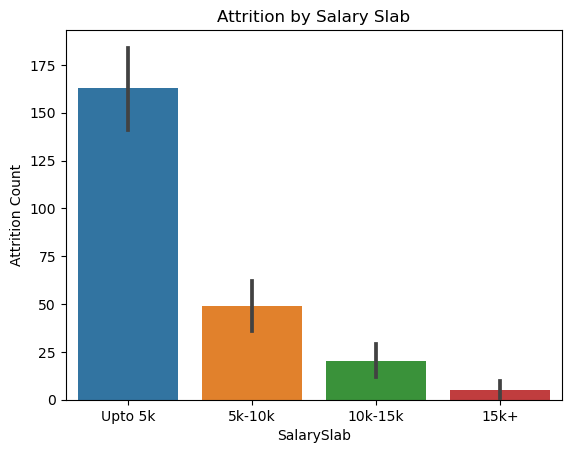

In [ ]:
sns.barplot(x='SalarySlab',y='Attrition Count',data=df_cleaned,estimator=sum)
plt.title('Attrition by Salary Slab')
plt.show()

### Note: Employees having Salary less than 5K were left the Organization. Employees having Salary more than 15K were having least attrition.

### Attrition by YearsAtCompany

<Figure size 1000x4000 with 0 Axes>

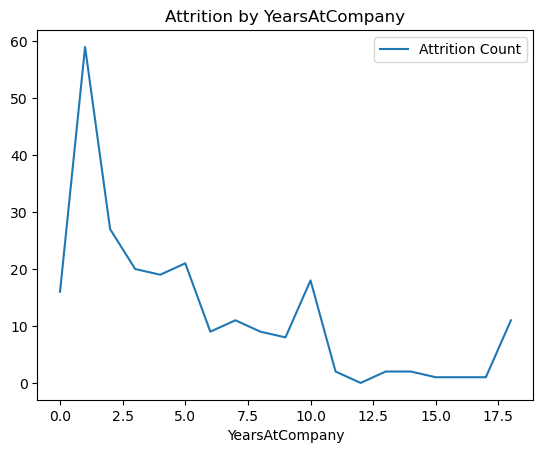

In [ ]:
plt.figure(figsize=(10,40))
df_cleaned.groupby(['YearsAtCompany']).sum().plot(kind='line',y='Attrition Count')
plt.title("Attrition by YearsAtCompany")
plt.show()

### Note: Most of the Attrition was from the Employees having less than 2.5 Yrs of Experience. Employees having around 12 Yrs of Experience were having least Attrition.

### Attrition by Department using Swarm Plot

Text(0.5, 1.0, 'Attrition by Department')

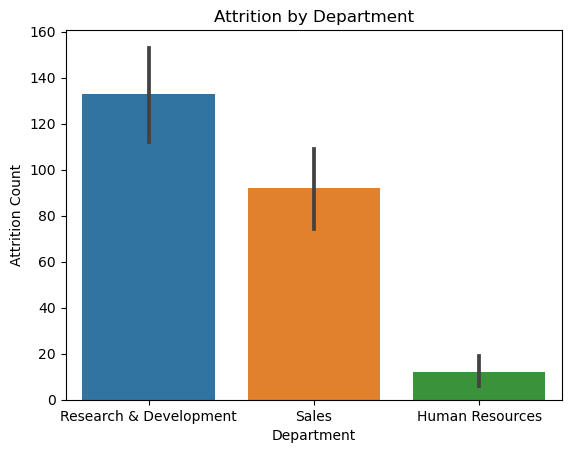

In [ ]:
sns.barplot(x='Department',y='Attrition Count',data=df_cleaned, estimator=sum)
plt.title('Attrition by Department')

### Note: Research and Development department had highest Attrition. Human Resources department had least Attrition.

### Attrition count

Text(0.5, 1.0, 'Attrition vs Stable Employees')

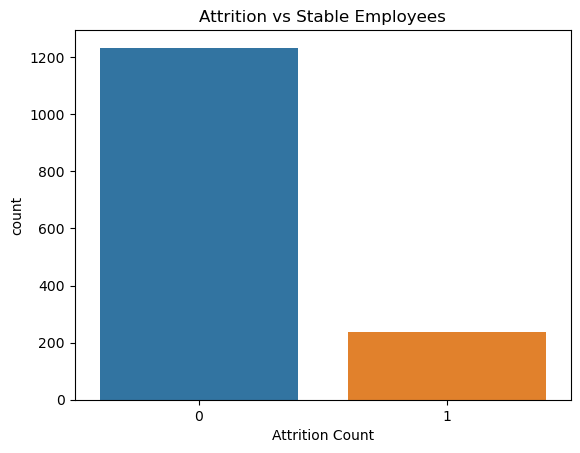

In [ ]:
sns.countplot(x='Attrition Count',data=df_cleaned)
plt.title('Attrition vs Stable Employees')

### Note: Around 237 Employees were left the Organization

### Attrition Percntage

In [ ]:
attrition_count = df_cleaned['Attrition Count'].sum()
print("Total Employees left the Organization:",attrition_count)

Total Employees left the Organization: 237


In [ ]:
total_employees = df_cleaned['EmpID'].count()
print("Total No.of Employees in the Organization:",total_employees)

Total No.of Employees in the Organization: 1470


In [ ]:
attrition_percent = (attrition_count/total_employees) * 100
print("Attrition Percentage of the Organization:",attrition_percent)

Attrition Percentage of the Organization: 16.122448979591837


### Attrition Percentage of the Organization is around 16%